In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.svm import SVC

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/uas-svm/UAS_SVM.csv


In [2]:
data = pd.read_csv ('../input/uas-svm/UAS_SVM.csv')
data

,Customer ID,Age,Income,Education,Occupation,Income.1,Average Balance,Appraisal,Industri,Pelunasan Kredit
0,1234561427,2,3,5,2,3,4,5,4,1
1,1234561518,1,4,3,3,5,1,3,1,0
2,1234561282,3,1,3,5,2,4,4,1,1
3,1234561064,5,1,3,1,3,2,4,1,0
4,1234561043,4,1,5,3,1,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...
994,1234561069,4,4,1,1,5,1,4,1,1
995,1234561523,4,2,1,5,1,5,4,1,0
996,1234561056,2,2,3,3,2,2,5,1,0
997,1234561346,5,4,5,5,2,4,2,1,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Customer ID       999 non-null    int64
 1   Age               999 non-null    int64
 2   Income            999 non-null    int64
 3   Education         999 non-null    int64
 4   Occupation        999 non-null    int64
 5   Income.1          999 non-null    int64
 6   Average Balance   999 non-null    int64
 7   Appraisal         999 non-null    int64
 8   Industri          999 non-null    int64
 9   Pelunasan Kredit  999 non-null    int64
dtypes: int64(10)
memory usage: 78.2 KB


In [4]:
data.isna().sum()

Customer ID         0
Age                 0
Income              0
Education           0
Occupation          0
Income.1            0
Average Balance     0
Appraisal           0
Industri            0
Pelunasan Kredit    0
dtype: int64

<AxesSubplot:>

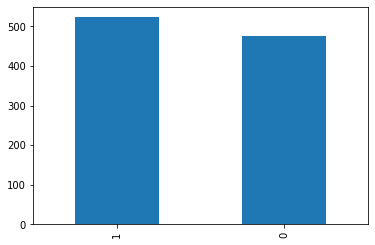

In [5]:
data['Pelunasan Kredit'].value_counts().plot(kind = 'bar')

In [6]:
x=data.drop(['Pelunasan Kredit'],axis=1).values
y=data['Pelunasan Kredit'].values
print (x)
print (y)

[[1234561427          2          3 ...          4          5          4]
 [1234561518          1          4 ...          1          3          1]
 [1234561282          3          1 ...          4          4          1]
 ...
 [1234561056          2          2 ...          2          5          1]
 [1234561346          5          4 ...          4          2          1]
 [1234561813          2          3 ...          1          4          2]]
[1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1
 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1
 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0
 1 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0
 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0
 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
x_train.shape, x_test.shape

((699, 9), (300, 9))

In [8]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [9]:
svc = SVC(C=100, random_state=1, kernel='rbf')
svc.fit(x_train, y_train)

SVC(C=100, random_state=1)

In [10]:
y_predict = svc.predict(x_test)
print (y_predict)

[1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1
 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0
 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0
 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0
 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1 0
 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1
 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0
 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1
 1 0 0 0]


In [11]:
score=r2_score(y_test,y_predict)
score

-0.8231377630814607

In [12]:
from sklearn.svm import SVC
from sklearn import metrics
svm_model= SVC()

In [13]:
y_predict= svc.predict(x_test)
print(metrics.accuracy_score(y_predict,y_test))

0.5466666666666666


In [14]:
cm = confusion_matrix(y_test, y_predict)
ac = accuracy_score (y_test,y_predict)
cr = classification_report (y_test,y_predict)

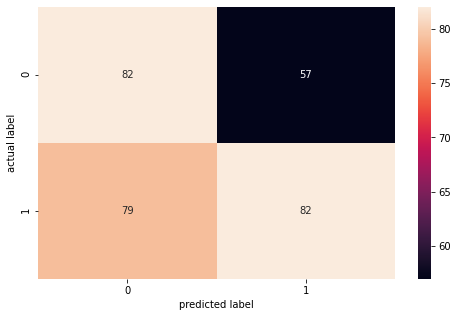

0.5466666666666666
              precision    recall  f1-score   support

           0       0.51      0.59      0.55       139
           1       0.59      0.51      0.55       161

    accuracy                           0.55       300
   macro avg       0.55      0.55      0.55       300
weighted avg       0.55      0.55      0.55       300



In [15]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt=".0f", ax=ax)
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.show()

print (ac)
print (cr)